In [31]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config2 import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [33]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [34]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [35]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [36]:
#  Use the tuple() function to display the latitude and longitude combination

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ribeira grande pt
new norfolk au
rikitea pf
saint-philippe re
mataura pf
rikitea pf
kapaa us
kodiak us
albany au
pevek ru
belushya guba ru
arraial do cabo br
nara ml
cape town za
ribeira grande pt
mala pe
palmer us
ushuaia ar
tuscaloosa us
tuktoyaktuk ca
mataura pf
port alfred za
port alfred za
mataura pf
sola vu
cherskiy ru
rikitea pf
atuona pf
kapaa us
severnyy ru
yar-sale ru
kamenka ru
boksitogorsk ru
illoqqortoormiut gl
san rafael ar
punta arenas cl
pangody ru
cururupu br
cape town za
nikolskoye ru
albany au
vestmannaeyjar is
cidreira br
walvis bay na
sitka us
kawalu id
jamestown sh
chokurdakh ru
santa catarina de tepehuanes mx
hithadhoo mv
barentsburg sj
miri my
attawapiskat ca
iqaluit ca
takoradi gh
norman wells ca
hunchun cn
puerto ayora ec
saldanha za
bluff nz
bluff nz
halalo wf
port alfred za
albany au
casablanca ma
hailar cn
mataura pf
new norfolk au
faanui pf
ostrovnoy ru
cape town za
inirida co
whitianga nz
rocha uy
tiksi ru
kokrek ru
new norfolk au
saint-philippe re
fortun

saint-philippe re
tadine nc
cape town za
nikolskoye ru
alofi nu
ushuaia ar
taolanaro mg
rikitea pf
saleaula ws
kyren ru
avera pf
ginebra co
hermanus za
satitoa ws
mys shmidta ru
rikitea pf
georgetown sh
ushuaia ar
vaini to
panama city us
dikson ru
bubaque gw
amderma ru
ixtapa mx
azare ng
belaya gora ru
provideniya ru
moron mn
karratha au
koungheul sn
omboue ga
paide ee
ushuaia ar
deputatskiy ru
kapaa us
coquimbo cl
arraial do cabo br
amursk ru
namatanai pg
grand-lahou ci
tuktoyaktuk ca
narsaq gl
attawapiskat ca
boyolangu id
rock sound bs
illoqqortoormiut gl
port alfred za
si bun ruang th
rikitea pf
ridgecrest us
kargasok ru
albany au
norman wells ca
jega ng
rikitea pf
kazalinsk kz
sergeyevka kz
pevek ru
nikolskoye ru
rikitea pf
albany au
ormara pk
rikitea pf
lebu cl
puerto ayora ec
new norfolk au
kapaa us
jamestown sh
busselton au
tuktoyaktuk ca
tuy hoa vn
veere nl
vaini to
vila franca do campo pt
mataura pf
hermanus za
vardo no
hofn is
atuona pf
labutta mm
bredasdorp za
ushuaia ar
tao

In [37]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city  not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [38]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [39]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | nara
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | mala
Processing Record 15 of Set 1 | palmer
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | tuscaloosa
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | sola
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 | atuona
Processing R

Processing Record 39 of Set 4 | haimen
Processing Record 40 of Set 4 | victoria
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | dikson
Processing Record 43 of Set 4 | bredasdorp
Processing Record 44 of Set 4 | solvychegodsk
Processing Record 45 of Set 4 | neryungri
Processing Record 46 of Set 4 | barrow
Processing Record 47 of Set 4 | braganca
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | san policarpo
Processing Record 50 of Set 4 | beyneu
Processing Record 1 of Set 5 | ierapetra
Processing Record 2 of Set 5 | sultepec
Processing Record 3 of Set 5 | mareeba
Processing Record 4 of Set 5 | dawei
Processing Record 5 of Set 5 | torbay
Processing Record 6 of Set 5 | ramona
Processing Record 7 of Set 5 | westport
Processing Record 8 of Set 5 | hamilton
Processing Record 9 of Set 5 | kismayo
Processing Record 10 of Set 5 | benghazi
Processing Record 11 of Set 5 | hartlepool
Processing Record 12 of Set 5 | linhares
Processing Record 

Processing Record 33 of Set 8 | padang
Processing Record 34 of Set 8 | nishihara
Processing Record 35 of Set 8 | qaqortoq
Processing Record 36 of Set 8 | chumikan
Processing Record 37 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 38 of Set 8 | adrar
Processing Record 39 of Set 8 | paramonga
Processing Record 40 of Set 8 | igrim
Processing Record 41 of Set 8 | jalu
Processing Record 42 of Set 8 | kafue
Processing Record 43 of Set 8 | sotnikovskoye
Processing Record 44 of Set 8 | egvekinot
Processing Record 45 of Set 8 | tadine
Processing Record 46 of Set 8 | saleaula
City not found. Skipping...
Processing Record 47 of Set 8 | kyren
Processing Record 48 of Set 8 | avera
Processing Record 49 of Set 8 | ginebra
Processing Record 50 of Set 8 | satitoa
City not found. Skipping...
Processing Record 1 of Set 9 | panama city
Processing Record 2 of Set 9 | bubaque
Processing Record 3 of Set 9 | ixtapa
Processing Record 4 of Set 9 | azare
Processing Record 5 of Set 9 | bel

Processing Record 18 of Set 12 | defiance
Processing Record 19 of Set 12 | la palma
Processing Record 20 of Set 12 | betioky
Processing Record 21 of Set 12 | arrifes
Processing Record 22 of Set 12 | ternate
Processing Record 23 of Set 12 | flin flon
Processing Record 24 of Set 12 | chandur bazar
Processing Record 25 of Set 12 | sydney mines
Processing Record 26 of Set 12 | kyaikkami
Processing Record 27 of Set 12 | krasnovishersk
Processing Record 28 of Set 12 | leningradskiy
Processing Record 29 of Set 12 | dubbo
Processing Record 30 of Set 12 | san angelo
Processing Record 31 of Set 12 | sistranda
Processing Record 32 of Set 12 | atyrau
Processing Record 33 of Set 12 | wenling
Processing Record 34 of Set 12 | klyuchi
Processing Record 35 of Set 12 | montepuez
Processing Record 36 of Set 12 | abu dhabi
Processing Record 37 of Set 12 | itaituba
Processing Record 38 of Set 12 | port lincoln
Processing Record 39 of Set 12 | lagoa
Processing Record 40 of Set 12 | misratah
Processing Recor

In [41]:
len(city_data)

554

In [47]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


In [48]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [49]:
# Assign a new or the same DataFrame with new column order.
city_data_df = city_data_df[new_column_order]

In [50]:
 city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2020-10-29 00:56:31,38.52,-28.70,67.64,86,64,21.21
1,New Norfolk,AU,2020-10-29 00:56:31,-42.78,147.06,69.01,54,42,1.01
2,Rikitea,PF,2020-10-29 00:56:32,-23.12,-134.97,74.98,81,100,11.65
3,Saint-Philippe,RE,2020-10-29 00:56:32,-21.36,55.77,69.80,64,0,5.82
4,Mataura,NZ,2020-10-29 00:56:32,-46.19,168.86,60.01,75,62,5.01
...,...,...,...,...,...,...,...,...,...
549,Skibbereen,IE,2020-10-29 00:57:30,51.55,-9.27,52.41,91,100,19.15
550,Eureka,US,2020-10-29 00:56:14,40.80,-124.16,62.01,64,0,1.39
551,The Valley,AI,2020-10-29 00:57:30,18.22,-63.06,78.01,85,64,10.00
552,Bull Savanna,JM,2020-10-29 00:57:30,17.89,-77.59,76.96,85,0,6.26


In [59]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [61]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [62]:
# Import the time module.
import time
# Get today's date in seconds.
#today = time.time()
today = time.strftime("%x")
#today

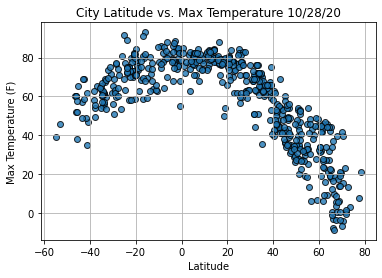

In [63]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

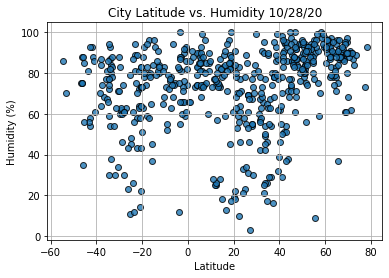

In [64]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

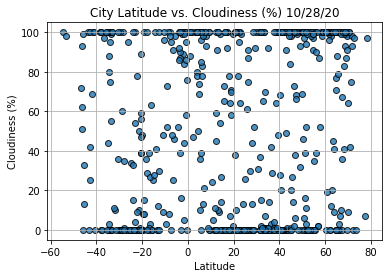

In [65]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

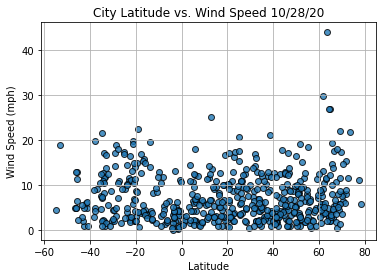

In [66]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
